# 06: Anisotropy

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
plt.rcParams['font.family']='arial'

<div class="alert alert-block alert-success">
<b>Learning Objectives:</b>
<ul>
    <li>Thomsen parameters</li>
    <li>Weak anistropic approximatio of phase velocities</li>
    <li>Backus average modeling</li>
</ul>
</div>

stressed-induced seismic anisotropy: if an initially isotropic
material develops anisotropy due to applied stress, the anisotropy must have at least
orthorhombic symmetry. 

## Thomsen parameters

The Elastic constant  of a transversely isotropic elastic material  in terms of Voigt notation can be represented as 

$
\begin{bmatrix}
  c_{11} & c_{12} & c_{13} & 0 & 0 & 0 \\
  c_{12} & c_{11} & c_{13} & 0 & 0 & 0 \\
  c_{13} & c_{13} & c_{33} & 0 & 0 & 0 \\
  0 & 0 & 0 & c_{44} & 0 & 0 \\
  0 & 0 & 0 & 0 & c_{44} & 0\\
  0 & 0 & 0 & 0 & 0 & c_{66}
\end{bmatrix}
$
where 
$
c_{66}=\frac{1}{2}\left(c_{11}-c_{12}\right)
$

Here z-axis is the unique symmetry axis, isotropy in xy-plane.

Thomsen (1986) simplified the elasticity of a VTI material by introducing 5 anisotropy parameters

P wave anisotropy: 
$
\varepsilon=\frac{c_{11}-c_{33}}{2 c_{33}}
$  

S wave anisotropy: 
$
\gamma=\frac{c_{66}-c_{44}}{2 c_{44}}
$  

Moveout parameters: 
$
\delta=\frac{\left(c_{13}+c_{44}\right)^{2}-\left(c_{33}-c_{44}\right)^{2}}{2 c_{33}\left(c_{33}-c_{44}\right)}
$  

P wave velocities: 
$
\alpha=\sqrt{c_{33} / \rho}
$ 

S wave velocities: 
$
\beta=\sqrt{c_{44} / \rho}
$

**Intepretation of $\varepsilon$, $\gamma$ and $\delta$**: 

The preceding equations are valid for any strength of VTI anisotropy, since they are just definitions. <br>

But for weak anisotropy, $\varepsilon$ is usually called "P-wave anisotropy", as it can be seen to approximatelt describe the fractional difference between the P-wave velocities parallel and orthogonal to the symmetry axis

$
\varepsilon \approx \frac{V_{\mathrm{P}}\left(90^{\circ}\right)-V_{\mathrm{P}}\left(0^{\circ}\right)}{V_{\mathrm{P}}\left(0^{\circ}\right)}
$

the constant $\gamma$ can be seen to describe the fractional difference between the SH-wave velocities parallel and orthogonal to the symmetry axis, which is equivalent to the difference between the velocities of S-waves polarized parallel and normal to the symmetry axis, both propagating normal to the symmetry axis:

$
\gamma \approx \frac{V_{\mathrm{SH}}\left(90^{\mathrm{o}}\right)-V_{\mathrm{SV}}\left(90^{\circ}\right)}{V_{\mathrm{SV}}\left(90^{\circ}\right)}=\frac{V_{\mathrm{SH}}\left(90^{\mathrm{o}}\right)-V_{\mathrm{SH}}\left(0^{\mathrm{o}}\right)}{V_{\mathrm{SH}}\left(0^{\circ}\right)}
$

$\delta$ is called moveout parameter as the small-offset normal moveout (NMO) velocity is affected by VTI anisotropy, $\delta$ goes into the equation for NMO velocities, $V_{NMO,P}$, $V_{NMO,SV}$, and $V_{NMO,SH} for
P-, SV-, and SH-modes calculation: 

$
V_{\mathrm{NMO}, \mathrm{P}}=\alpha \sqrt{1+2 \delta}
$

$
V_{\mathrm{NMO}, \mathrm{SV}}=\beta \sqrt{1+2 \sigma}, \quad \sigma=\left(\frac{\alpha}{\beta}\right)^{2}(\varepsilon-\delta)
$

$
V_{\mathrm{NMO}, \mathrm{SH}}=\beta \sqrt{1+2 \gamma}
$

In terms of the Thomsen parameters, the three phase velocities for weak anisotropy can
be approximated as

$
V_{\mathrm{P}}(\theta) \approx \alpha\left(1+\delta \sin ^{2} \theta \cos ^{2} \theta+\varepsilon \sin ^{4} \theta\right)
$

$
V_{\mathrm{SV}}(\theta) \approx \beta\left[1+\frac{\alpha^{2}}{\beta^{2}}(\varepsilon-\delta) \sin ^{2} \theta \cos ^{2} \theta\right]
$

$
V_{\mathrm{SH}}(\theta) \approx \beta\left(1+\gamma \sin ^{2} \theta\right)
$

In [47]:
def Thomsen(C11, C33, C13, C44, C66, den, theta):
    """Computes  three phase velocities for weak anisotropy using Thomsen’s parameters. Written by Jiaxin Yu (July 2021)

    Args:
        C11 (GPa): stiffness
        C33 (GPa): stiffness
        C13 (GPa): stiffness
        C44 (GPa): stiffness
        C66 (GPa): stiffness
        den (g/cm3): density of the medium
        theta (unitless): angle of incidence

    Returns:
        VP, VSV, VSH: wave velocities propagating along given direction
    """    
    alpha= np.sqrt(C33/den) *1e3
    beta= np.sqrt(C44/den) *1e3
    epsilon= 0.5* (C11-C33)/C33
    gamma= 0.5 * (C66-C44)/C44
    theta= np.deg2rad(theta)
    delta= ((C13+C44)**2-(C33-C44)**2 )/ (2*C33*(C33-C44))
    VP= alpha*(1+delta*np.sin(theta)**2*np.cos(theta)**2+epsilon*np.sin(theta)**4)
    VSV= beta*(1+alpha**2/beta**2 * (epsilon-delta)*np.sin(theta)**2*np.cos(theta)**2)
    VSH= beta*(1+gamma*np.sin(theta)**2)
    return VP, VSV, VSH

## Backus average
The Backus average is used to model a finely stratified medium as a single homogeneous medium.all materials are linearly elastic; there are no sources of intrinsic energy dissipation, such as friction or viscosity;
and the layer thickness must be much smaller than the seismic wavelength. 

For a periodically layered medium with isotropic layers of n materials {n1, n2, ...} having concentrations {f1,f2,....}, f1+f2+...=1 and elastic moduli (Lamé coefficients) λ1,G1, λ2,G2,...λn,Gn:

$
C_{11}=\left\langle\frac{4 \mu(\lambda+\mu)}{\lambda+2 \mu}\right\rangle+\left\langle\frac{1}{\lambda+2 \mu}\right\rangle^{-1}\left\langle\frac{\lambda}{\lambda+2 \mu}\right\rangle^{2}
$

$
C_{33}=\left\langle\frac{1}{\lambda+2 \mu}\right\rangle^{-1}
$

$
C_{13}=\left\langle\frac{1}{\lambda+2 \mu}\right\rangle^{-1}\left\langle\frac{\lambda}{\lambda+2 \mu}\right\rangle
$

$
C_{44}=\left\langle\frac{1}{\mu}\right\rangle^{-1}
$

$
C_{66}=\langle\mu\rangle
$

$
C_{12}=C_{11}-2C_{66}
$


In [3]:
def Backus(V,lamda, G ):
    """Computes stiffnesses of a layered medium using backus average model. Written by Jiaxin Yu (July 2021)

    Args:
        V (num or array-like, frac): volumetric fractions of N isotropic layering materials
        lamda (num or array-like): Lamé coefficients of N isotropic layering materials
        G (num or array-like, GPa): shear moduli of N isotropic layering materials
    Returns:
        C11,C33,C13,C44,C66 (num or array-like, GPa): Elastic moduli of the anisotropic layered media
    """    
    C33=np.dot(V, 1/(lamda+2*G)) **-1
    C44=np.dot(V, 1/G)**-1
    C66=np.dot(V, G)
    C13=np.dot(V, 1/(lamda+2*G)) **-1 * np.dot(V, lamda/(lamda+2*G))
    C11=np.dot(V, 4*G*(lamda+G)/(lamda+2*G))+np.dot(V, 1/(lamda+2*G))**-1 * np.dot(V, lamda/(lamda+2*G))**2
    
    return C11,C33,C13,C44,C66


## Examples
* Let's estimate angle dependent weak anisotropy of a layered medium using backus average model.

In [48]:
# specify model parameters
lamda1, G1=5,5
lamda2, G2=1,1
den1=2.25
den2=2.0
V1,V2= 0.5,0.5 # volumetric fraction
# Compute anisotropic elastic moduli
V=np.array([V1,V2])
lamda= np.array([lamda1,lamda2])
G= np.array([G1,G2])
C11,C33,C13,C44,C66= Backus(V,lamda,G)
# compute effective density
den= np.dot(V,np.array([den1,den2]))
# compute angle dependent anisotropy from layering
theta=np.linspace(0,90,50)
VP, VSV, VSH= Thomsen(C11,C33,C13,C44,C66,den, theta)

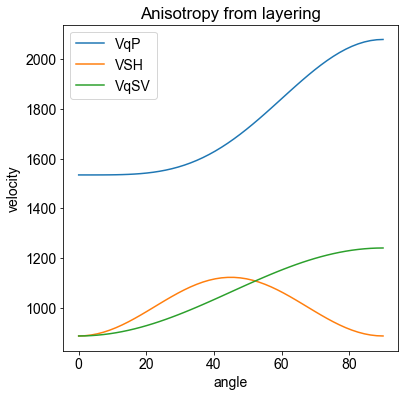

In [50]:
# plot
plt.figure(figsize=(6,6))
plt.xlabel('angle')
plt.ylabel('velocity')
plt.title('Anisotropy from layering')
plt.plot(theta, VP, label='VqP')
plt.plot(theta, VSV,label='VSH')
plt.plot(theta, VSH,label='VqSV')
plt.legend(loc='best')

<div class="alert alert-block alert-info">
<b>Reference:</b> Mavko, G., Mukerji, T. and Dvorkin, J., 2020. The rock physics handbook. Cambridge university press.
</div>